In [19]:
"""
University of Liege
ELEN0062 - Introduction to machine learning
Project 1 - Classification algorithms
"""
#! /usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

from plot import plot_boundary
from data import make_balanced_dataset, make_unbalanced_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# (Question 2)

# Put your funtions here
# ...
def ten_fold_cross_validation(n_neighbors):
    # Generate one set
    scores = []
    X, y = make_unbalanced_dataset(3000, random_state = 1)

    for neighbor in n_neighbors:
        folds = []
        for i in range(10):
            cut1 = i*300
            cut2 = (i+1)*300

            X_test, y_test = X[cut1:cut2], y[cut1:cut2]
            X_train_pt1, y_train_pt1 = X[:cut1], y[:cut1]
            X_train_pt2, y_train_pt2 = X[cut2:], y[cut2:]

            X_train = np.append(X_train_pt1, X_train_pt2, axis = 0)
            y_train = np.append(y_train_pt1, y_train_pt2, axis = 0)

            knn_estimator = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
            folds.append(accuracy_score(y_test, knn_estimator.predict(X_test)))
        scores.append(np.mean(folds))

    index = np.argmax(scores)
    return n_neighbors[index], scores

def evolution_mean_test_accuracies():
    X_test, y_test = make_unbalanced_dataset(500, random_state = 1) # Fixed test set
    train_sizes = [50, 150, 250, 350, 450, 500]
    gen = 10
    
    optimal_neighbors = []
    
    for N in train_sizes:
        accuracies_neighbors = []
        n_neighbors = np.arange(1, N+1)
        for neighbor in n_neighbors:
            accuracies_gens = []
            for i in range(gen):
                X_train, y_train = make_unbalanced_dataset(N, random_state = i) # Ten different training sets of size N
                
                # Train model
                knn_estimator = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
                # Test model
                accuracies_gens.append(accuracy_score(y_test, knn_estimator.predict(X_test)))
            accuracies_neighbors.append(np.mean(accuracies_gens))
            
        index = np.argmax(accuracies_neighbors)
        optimal_neighbors.append(n_neighbors[index])
        
        plt.plot(n_neighbors, accuracies_neighbors)
    plt.legend(['N = 50', 'N = 150', 'N = 250', 'N = 350', 'N = 450', 'N = 500'], loc = 'lower right')
    plt.title("Accuracy with respect to number of neighbors for different training set sizes (N)")
    plt.xlabel("n_neighbors")
    plt.ylabel("Accuracy")
    plt.savefig("accuracy.pdf")
    
    return optimal_neighbors
    

if __name__ == "__main__":
    # Put your code here
    n_neighbors = np.array([1, 5, 50, 100, 500]);


    # Observe how the decision boundary is affected by the number of neighbors
    X, y = make_unbalanced_dataset(3000, random_state = 1)
    X_train, X_test, y_train, y_test = X[:1000], X[1000:], y[:1000], y[1000:]

    for neighbor in n_neighbors:
        knn_estimator = KNeighborsClassifier(n_neighbors = neighbor).fit(X_train, y_train)
        plot_boundary("n_neighbors"+str(neighbor), knn_estimator, X, y, mesh_step_size = 0.2, title="n_neighbors "+str(neighbor))


    # 10-fold cross validation to optimize n_neighbors parameter
    optimal_k, scores = ten_fold_cross_validation(n_neighbors)
    print("k optimal : " + str(optimal_k))
    i = 0
    print("Scores obtained for different numbers of neighbors : ")
    for neighbor in n_neighbors:
        print("Score for n_neighbors = " +str(neighbor) + " : " + str(scores[i]))
        i = i + 1

    

k optimal : 100
Scores obtained for different numbers of neighbors : 
Score for n_neighbors = 1 : 0.908
Score for n_neighbors = 5 : 0.9339999999999999
Score for n_neighbors = 50 : 0.9343333333333332
Score for n_neighbors = 100 : 0.938
Score for n_neighbors = 500 : 0.9326666666666664


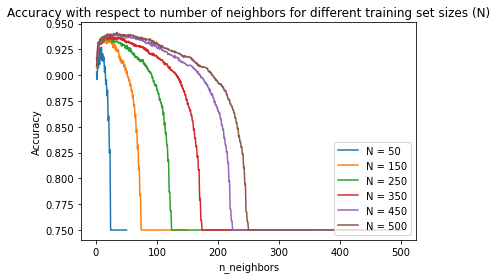

In [20]:
    # Evolution of mean test accuracies 
    optimal_neighbors = evolution_mean_test_accuracies()

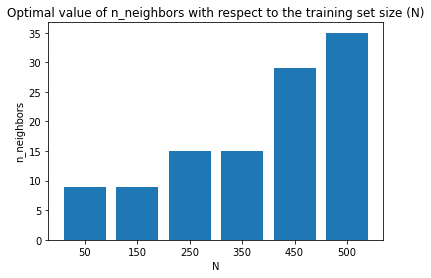

In [35]:
    # Optimal value of n_neighbors with respect to the training set size
    train_sizes = ['50', '150', '250', '350', '450', '500']

    plt.bar(train_sizes, optimal_neighbors, width = 0.8)
    plt.title("Optimal value of n_neighbors with respect to the training set size (N)")
    plt.xlabel("N")
    plt.ylabel("n_neighbors")
    plt.savefig("optimal.pdf")
    